In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
import datetime
import sys
import logging
import math
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.integrate import simps

In [24]:
sensor_df = pd.DataFrame.from_csv("../../data/database/sensor_data.csv")
sensor_df = sensor_df[~((sensor_df.TagName == 'Start1') | (sensor_df.TagName == 'Start2'))]
Counter(sensor_df.TagName)

Counter({'Tag0': 352461,
         'Tag1': 272234,
         'Tag2': 377420,
         'Tag3': 398370,
         'Tag4': 428642,
         'Tag5': 435086,
         'Tag6': 358288,
         'Tag7': 315266,
         'Tag8': 431390,
         'Tag9': 381880})

In [27]:
tester_df = pd.DataFrame.from_csv("../../data/database/tester_info.csv")

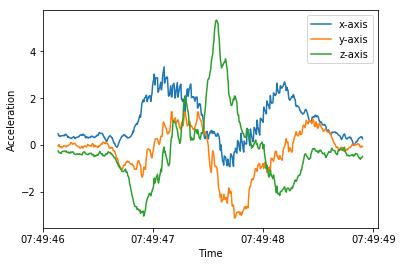

In [28]:
user0 = sensor_df[sensor_df.tester_id == 0]
user0_action_1 = user0[user0.TagName == 'Tag0']
# 1 2 3 4 9 10 11
user0_action_1_acc = user0_action_1[user0_action_1.SENSORTYPE == 10]
x, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES1, label = 'x-axis')
y, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES2, label = 'y-axis')
z, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES3, label = 'z-axis')
plt.ylabel("Acceleration")
plt.xlabel("Time")
plt.legend(handles=[x,y,z])
plt.savefig('/Users/Ageha/Desktop/linear_acc_gesture0.png')
plt.show()

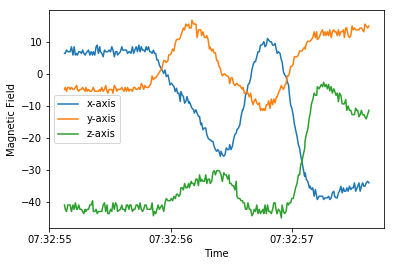

In [39]:
user0 = sensor_df[sensor_df.tester_id == 1]
user0_action_1 = user0[user0.TagName == 'Tag4']
# 1 2 3 4 9 10 11
user0_action_1_acc = user0_action_1[user0_action_1.SENSORTYPE == 2]
x, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES1, label = 'x-axis')
y, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES2, label = 'y-axis')
z, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES3, label = 'z-axis')
plt.ylabel("Magnetic Field")
plt.xlabel("Time")
plt.legend(handles=[x,y,z])
plt.savefig('/Users/Ageha/Desktop/mag_gesture4.png')
plt.show()

In [ ]:
def shrink_array(array,size):
    
    ratio = float(len(array)) / float(size+1)
    res = []
    for i in range(size):
        res.append(np.mean(array[math.floor(i*ratio):math.ceil((i+1.0)*ratio)], axis = 0))
    return np.array(res)

In [ ]:
for i in range(10):


    # 1 2 3 4 9 10 11
    user0_action_1_acc = user0_action_1[user0_action_1.SENSORTYPE == 12]
    z, = plt.plot(list(range(50)), shrink_array(user0_action_1_acc.VALUES3.values, 50))
    # plt.title("Example Accelerometer Sensor Reading of Gesture 4")
# plt.legend(handles=[x,y,z])
# plt.savefig('/Users/Ageha/Desktop/acc_gesture4.png')
plt.show()

In [ ]:
tester_df[tester_df.index == 11]

In [14]:
data = pd.DataFrame.from_csv("../../data/global_acc_features_df.csv")
data.head()

,unix_timestamp,TagName,tester_id,v_1,v_2,v_3,d_1,d_2,d_3,global_acc1,global_acc2,global_acc3,v_12_square,acc_12_square,d_12_square
0,1.515398e+09,Tag0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-0.058561,-0.130082,-0.520824,0.000000,0.142656,0.000000
1,1.515398e+09,Tag0,0.0,0.000479,-0.000149,-0.000230,0.000001,-3.732660e-07,-5.741219e-07,0.021859,-0.064001,-0.489335,0.000502,0.067631,0.000001
2,1.515398e+09,Tag0,0.0,0.001141,-0.000087,-0.000419,0.000005,-1.139782e-06,-2.229902e-06,-0.002340,-0.037200,-0.522459,0.001144,0.037273,0.000005
3,1.515398e+09,Tag0,0.0,0.001498,0.000065,-0.001128,0.000013,-1.150531e-06,-6.649349e-06,-0.070036,0.008021,-0.501289,0.001499,0.070494,0.000013
4,1.515398e+09,Tag0,0.0,0.001745,0.000385,-0.001286,0.000021,-2.828889e-07,-1.335681e-05,-0.069951,0.008737,-0.501289,0.001787,0.070494,0.000021


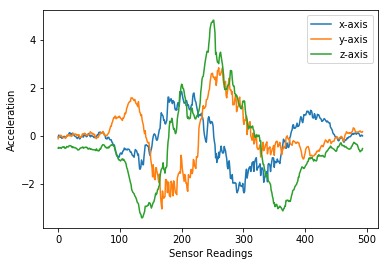

In [15]:
cur = data[(data.TagName == 'Tag0') & (data.tester_id == 0.0)]
x, = plt.plot(cur.global_acc1, label = 'x-axis')
y, = plt.plot(cur.global_acc2, label = 'y-axis')
z, = plt.plot(cur.global_acc3, label = 'z-axis')
plt.ylabel("Acceleration")
plt.xlabel("Sensor Readings")
plt.legend(handles=[x,y,z])
plt.savefig('/Users/Ageha/Desktop/globalacc_gesture0.png')
plt.show()

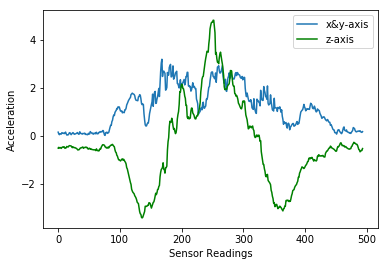

In [41]:
cur = data[(data.TagName == 'Tag0') & (data.tester_id == 0.0)]
x, = plt.plot(cur.acc_12_square, label = 'x&y-axis')
z, = plt.plot(cur.global_acc3, label = 'z-axis', color='green')
plt.ylabel("Acceleration")
plt.xlabel("Sensor Readings")
plt.legend(handles=[x,z])
plt.savefig('/Users/Ageha/Desktop/globalacc_xy_gesture0.png')
plt.show()


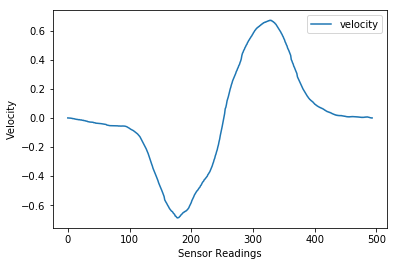

In [17]:
cur = data[(data.TagName == 'Tag0') & (data.tester_id == 0.0)]
x, = plt.plot(cur.v_3, label = 'velocity')
plt.legend(handles=[x])
plt.ylabel("Velocity")
plt.xlabel("Sensor Readings")
plt.savefig('/Users/Ageha/Desktop/corrected_velocity_z_gesture0.png')
plt.show()

In [18]:
acc3 = cur.global_acc3.values
v_3 = []
t = cur.unix_timestamp.values
for i in range(len(t)):
    v_3.append(simps(acc3[:i+1], x=t[:i+1]))


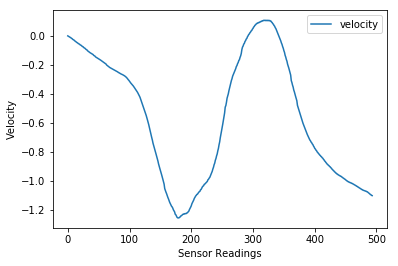

In [19]:
x, = plt.plot(v_3, label = 'velocity')
plt.legend(handles=[x])
plt.ylabel("Velocity")
plt.xlabel("Sensor Readings")
plt.savefig('/Users/Ageha/Desktop/velocity_z_gesture0.png')
plt.show()

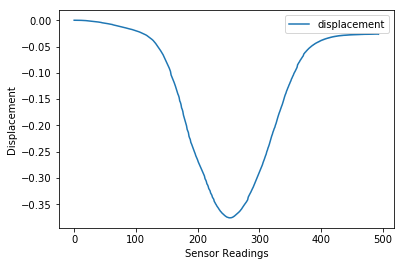

In [20]:
cur = data[(data.TagName == 'Tag0') & (data.tester_id == 0.0)]
x, = plt.plot(cur.d_3, label = 'displacement')
plt.ylabel("Displacement")
plt.xlabel("Sensor Readings")
plt.legend(handles=[x])
plt.savefig('/Users/Ageha/Desktop/displacement_z_gesture0.png')
plt.show()

In [ ]:
groups = data.groupby(['TagName','tester_id'])
tag0 = []
tag6 = []
for key in groups.groups.keys():
    c.append(len(groups.get_group(key)))
    cur = data[(data.TagName == 'Tag0') & (data.tester_id == 0.0)]
    
x, = plt.plot(cur.d_3, label = 'displacement')
plt.ylabel("Displacement")
plt.xlabel("Sensor Readings")
plt.legend(handles=[x])
plt.savefig('/Users/Ageha/Desktop/displacement_z_gesture0.png')
plt.show()
    

In [21]:
groups = data.groupby(['TagName','tester_id'])
c = []
for key in groups.groups.keys():
    c.append(len(groups.get_group(key)))

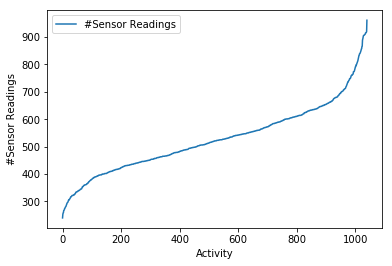

In [22]:
x, = plt.plot(sorted(np.array(c)), label = '#Sensor Readings')
plt.ylabel("#Sensor Readings")
plt.xlabel("Activity")
plt.legend(handles=[x])
plt.savefig('/Users/Ageha/Desktop/sensor_readings.png')
plt.show()


In [7]:
groups = data.groupby(['TagName','tester_id'])
t = []
for k in groups.groups.keys():
    cur_g = groups.get_group(k)
    t.append(max(cur_g.unix_timestamp.values) - min(cur_g.unix_timestamp.values))


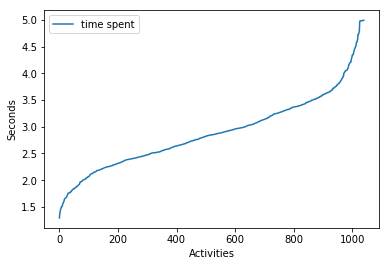

In [10]:
x, = plt.plot(sorted(t), label = 'time spent')
plt.legend(handles=[x])
plt.xlabel('Activities')
plt.ylabel('Seconds')
plt.savefig('/Users/Ageha/Desktop/time.png')
plt.show()

In [11]:
t = np.array(t)

In [12]:
len(t[t<4])/len(t)

0.9336538461538462